In [175]:
#importing packages
import inline as inline
import matplotlib as matplotlib
#%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [176]:
df = pd.read_csv('creditcard.csv')

In [177]:
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [178]:
print(df.sample (6))

            Time        V1        V2        V3        V4        V5        V6  \
42465    41113.0 -1.012790  0.333080  0.218020 -0.137405  3.262296  3.619439   
193705  130255.0  2.031309 -0.831831 -0.313988  0.549036 -0.935283  0.225721   
14456    25611.0  1.141733 -0.882556  1.434450  0.458561 -1.236536  1.390755   
231433  146761.0  1.969758 -1.293593  0.455090  0.727151 -1.137176  1.914024   
175131  122208.0 -2.482915  0.253567  1.162849  0.616178 -1.082907  1.111207   
149005   90438.0 -0.249580  0.540441 -0.253945 -1.260561  1.575849 -0.039919   

              V7        V8        V9  ...       V21       V22       V23  \
42465   0.540119  0.500474 -0.104764  ... -0.476183 -1.025268 -0.412805   
193705 -1.115646  0.200184 -0.051748  ... -0.104707  0.336911  0.122420   
14456  -1.526407  0.620537  2.062745  ...  0.013700  0.466929 -0.268211   
231433 -1.928871  0.565181  1.052368  ... -0.258536  0.311968  0.005278   
175131 -1.195194  1.487969  0.753706  ...  0.279827  1.241811  0

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [180]:
#numerical summary -> only non-anonymized columns of interest
#pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


<AxesSubplot:title={'center':'Distribution of Time Feature'}, xlabel='Time', ylabel='Density'>

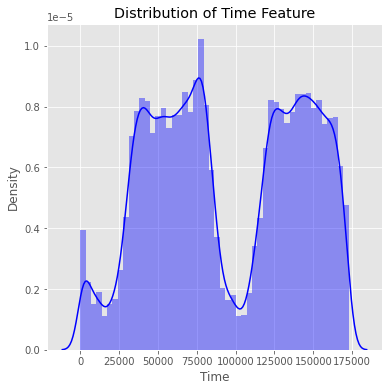

In [181]:
#visualizations of time and amount
plt.figure(figsize=(6,6))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time , color= 'b')

<AxesSubplot:title={'center':'Distribution of Monetary Value Feature'}, xlabel='Amount', ylabel='Density'>

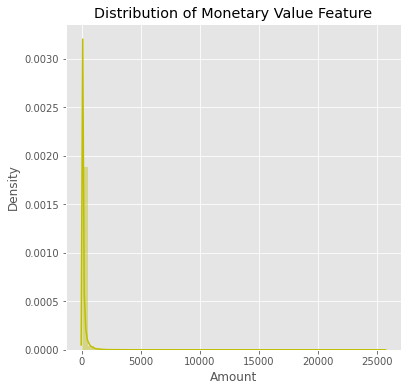

In [182]:
plt.figure(figsize=(6,6))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount , color='y')

In [183]:
#fraud vs. normal transactions
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

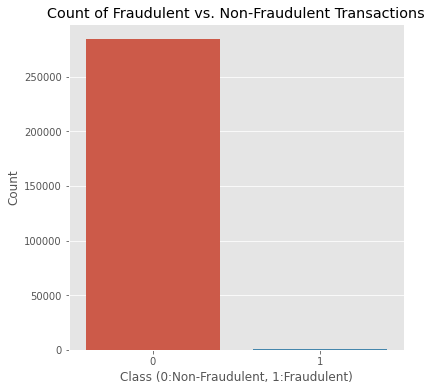

In [184]:
plt.figure(figsize=(6,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [185]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


Text(0.5, 1.0, 'Heatmap of Correlation')

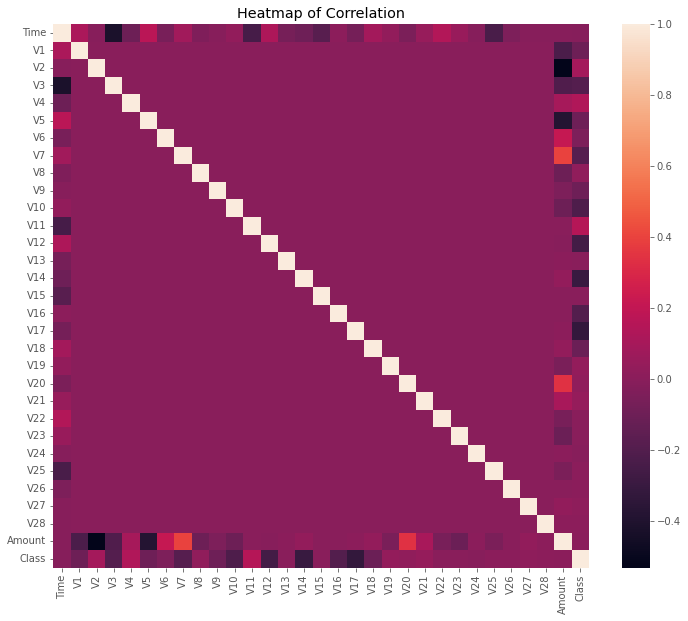

In [186]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [187]:
#skewness
skew_ = df.skew()
skew_

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

In [188]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [189]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [190]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
136059,81524.0,-1.204934,1.433359,1.316611,-0.306951,-0.088300,-0.270904,0.499121,0.244018,-0.072823,...,0.053992,0.189019,-0.175461,0.085374,0.594290,0.302223,8.94,0,-0.317487,-0.279857
51158,44821.0,-1.708581,-1.472591,1.487678,0.360959,1.751276,-1.954249,-0.731276,0.145248,0.446455,...,0.308585,0.423366,-0.432343,0.152323,0.068695,0.218424,13.79,0,-0.298096,-1.052746
220324,142116.0,-0.026805,0.777402,-0.414526,-0.631173,0.863188,-0.783428,1.371614,-0.308942,-0.195335,...,-0.149389,0.772959,-0.102983,0.441961,-0.126725,0.034354,39.99,0,-0.193346,0.996085
63153,50587.0,-3.581078,-6.183175,0.310409,2.245108,-3.188282,1.942361,1.252846,-0.860601,-0.518176,...,-1.884655,0.079729,0.631232,-0.366234,-0.159564,0.480278,1881.36,0,7.168610,-0.931326
156158,107446.0,-0.630582,0.569557,2.037367,-0.525580,1.009279,1.779752,0.186938,0.351432,1.343428,...,-0.285683,-1.746091,0.095636,-0.614857,-0.040161,-0.173211,11.27,0,-0.308171,0.266007


In [191]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [192]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256191, 31)
Test Shape: (28616, 31)


In [193]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [194]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 436 fraudulent transactions in the train data.


In [195]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [196]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
139870,-0.596130,0.848167,2.283774,-0.167788,0.132955,-0.187814,0.465421,-0.236984,1.705030,-1.012495,...,-0.500420,-0.314109,-0.293598,0.231282,-0.725586,-0.217438,-0.147041,0,-0.344753,0.227639
72954,-2.227072,2.024517,1.202342,0.375396,-1.032798,0.752067,-0.889875,0.813497,1.066844,1.721723,...,1.047613,-0.038849,-0.326955,-0.134761,-0.223043,-0.147126,0.291746,0,-0.347552,-0.758882
136581,-0.863593,-4.565931,-0.009516,5.616309,-2.497679,1.861811,0.187822,0.167752,2.353988,0.059315,...,-0.254636,-0.967660,-0.030582,-0.898824,-0.090810,-0.200740,0.207952,0,5.089205,0.031716
74224,0.416891,-1.650930,-0.595269,-1.774154,-0.884209,-1.075511,0.749726,-0.431758,1.389047,-1.802829,...,-0.299056,-0.409694,0.152374,0.438226,-0.969866,-0.004805,0.102607,0,1.498284,-0.745511
35764,-1.584026,-4.430534,-0.211289,2.422500,-2.336798,0.354042,1.197101,-0.169033,0.390431,-0.673402,...,-0.221911,-1.163883,0.457971,-0.305796,-0.484696,-0.186522,0.282281,0,5.244091,-1.155803


In [197]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [198]:
subsample = pd.concat([selected, fraud])
len(subsample)

872

In [199]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-4.384221,3.264665,-3.077158,3.403594,-1.938075,-1.221081,-3.310317,-1.111975,-1.977593,-3.288204,...,-0.990303,-0.330358,0.158378,0.006351,-0.493860,-1.537652,-0.994022,1,-0.170757,-0.757914
1,-1.102565,1.532958,-1.698146,-0.174136,0.695250,-1.029949,0.744581,0.572079,-0.315430,-1.326263,...,0.088350,-0.277678,-0.868405,0.026635,-0.175091,0.054790,0.085367,0,-0.205540,1.175456
2,-3.035730,-3.620910,-0.693223,-1.511104,-4.489085,1.722356,4.338491,0.183823,0.803041,-3.173125,...,0.148364,3.180187,-0.107737,-0.056183,-0.435536,-0.390435,0.182860,0,5.108716,-1.046260
3,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,-12.888158,...,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,1,-0.353229,-1.128302
4,1.776652,-0.456574,-0.521360,1.278753,-0.374586,-0.035029,-0.382870,0.001488,0.867578,0.165373,...,0.685058,0.065908,0.654908,-0.087379,-0.602037,0.033223,-0.005522,0,0.086560,0.856155
5,1.309924,-0.477625,0.785645,-0.414668,-1.112330,-0.729377,-0.748879,-0.110725,0.617772,0.213517,...,-0.491814,0.212867,0.301446,0.053767,-0.509520,-0.008844,0.017283,0,-0.249279,-1.917321
6,-0.718048,1.106859,1.443895,-0.252288,0.087198,-0.116147,0.507290,0.244743,-0.425405,0.127093,...,-0.413662,0.008394,-0.013165,-0.255425,0.089185,0.383052,0.166425,0,-0.333279,-0.412459
7,-0.296580,0.508381,1.050137,-1.836131,1.113947,0.180129,1.005162,-0.340919,0.071675,-0.162840,...,-0.291176,-0.410311,-1.360891,-0.240271,0.767233,-0.464806,-0.361872,0,-0.345633,-1.169828
8,1.193916,-0.571085,0.742522,-0.014588,-0.624561,0.832162,-0.833350,0.272897,1.169425,-0.371672,...,0.207265,-0.265272,-0.679294,0.511812,1.246604,-0.028671,-0.006112,1,-0.225650,-0.620279
9,0.136785,1.016260,-1.062744,0.009192,0.163890,-1.326285,0.647392,0.150824,-0.088430,-1.143722,...,0.923201,-0.000637,-0.102030,-0.289699,-0.145998,-0.080484,-0.046064,0,-0.182071,0.834107


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

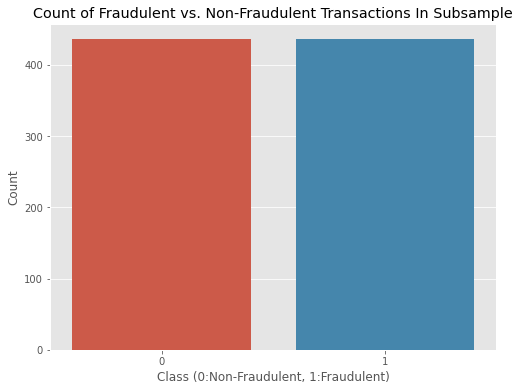

In [200]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [201]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.412909
V2,0.480211
V3,-0.561423
V4,0.702926
V5,-0.372399
V6,-0.407016
V7,-0.476721
V8,0.070576
V9,-0.567817
V10,-0.625339


In [202]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.561423
V9,-0.567817
V10,-0.625339
V12,-0.686975
V14,-0.743018
V16,-0.599678
V17,-0.559128


In [203]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V4,0.702926
V11,0.690335
Class,1.000000


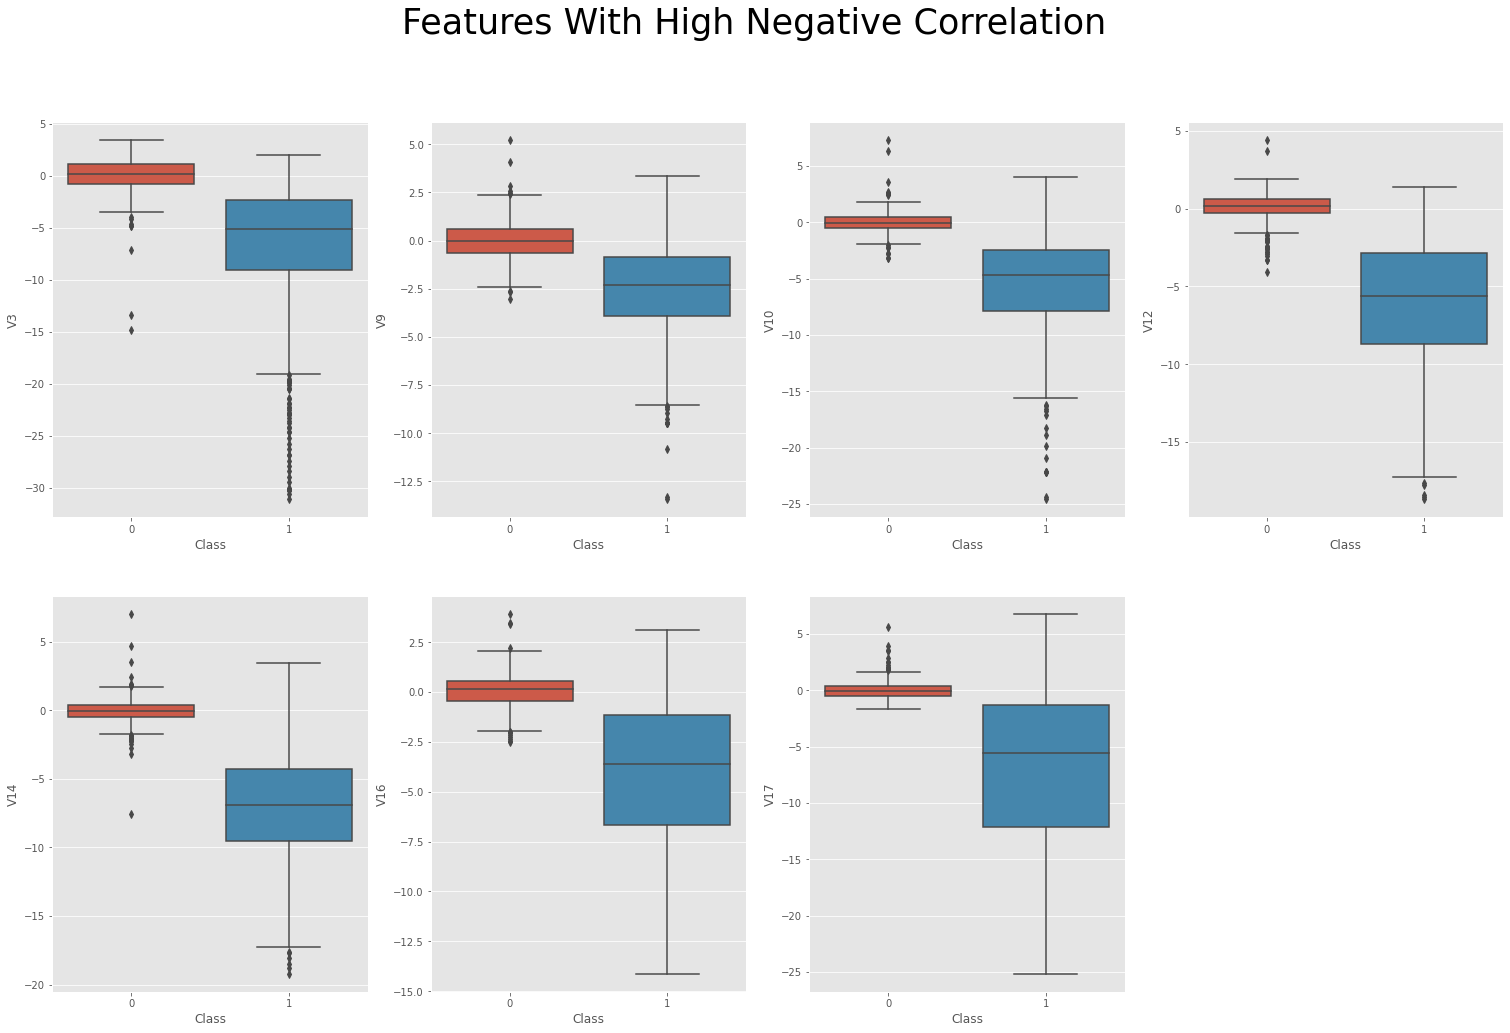

In [204]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

<AxesSubplot:xlabel='Class', ylabel='V11'>

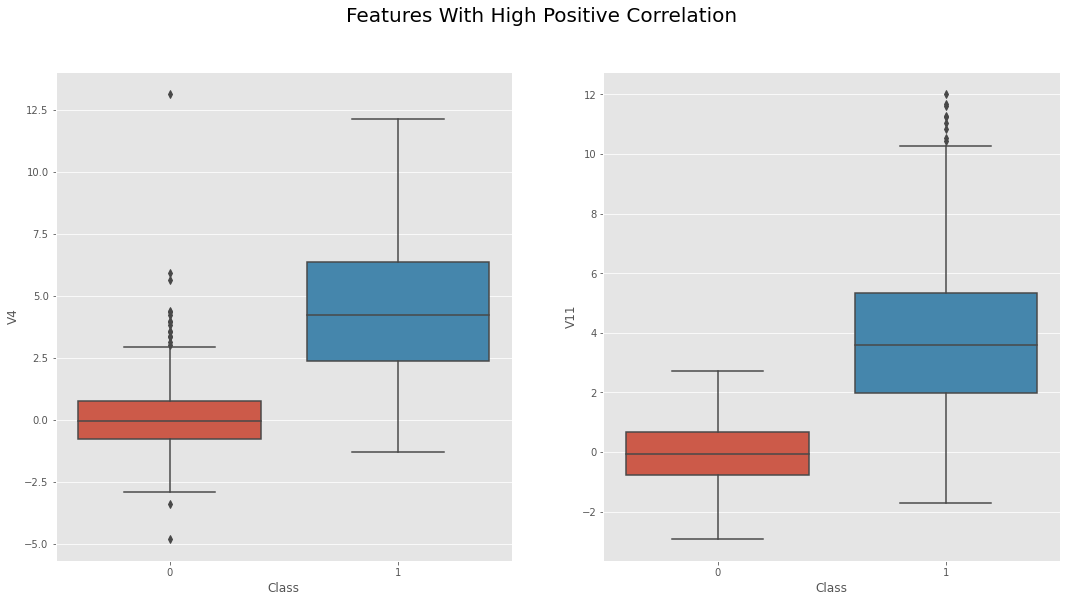

In [205]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

In [206]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [207]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 872 transactions by 253 transactions to 619 transactions.


In [208]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [209]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

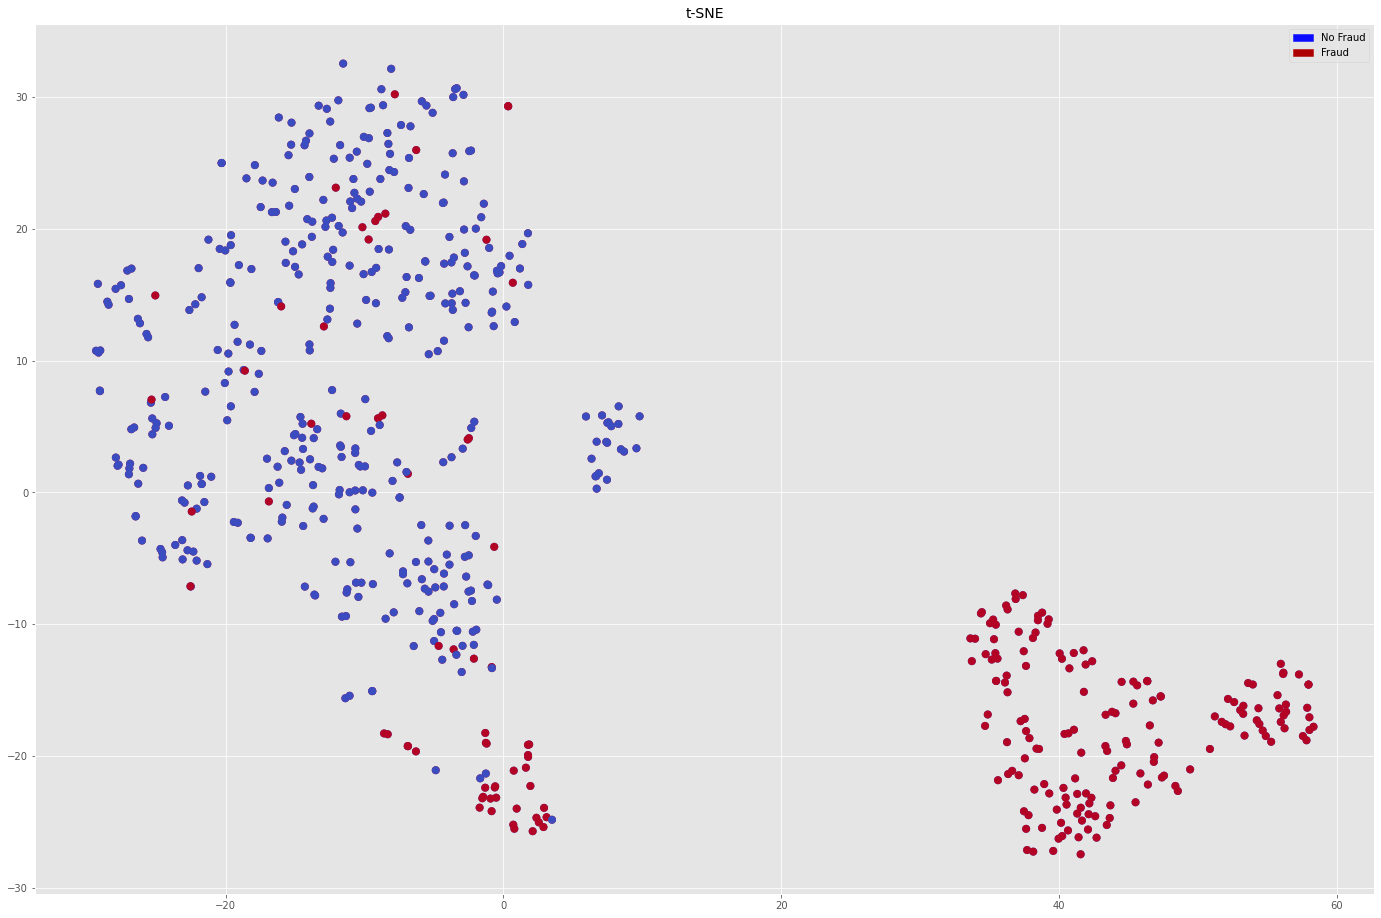

In [210]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

In [211]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [212]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [213]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [214]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (495, 30) (124, 30) 

Y_shapes:
 Y_train: Y_validation:
 (495,) (124,)


In [215]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [216]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42, shuffle= True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.955540 (0.028189)
LDA: 0.956089 (0.035192)
KNN: 0.938761 (0.043780)
CART: 0.906505 (0.054211)
SVM: 0.955428 (0.030636)
XGB: 0.957792 (0.040220)
RF: 0.957670 (0.039735)


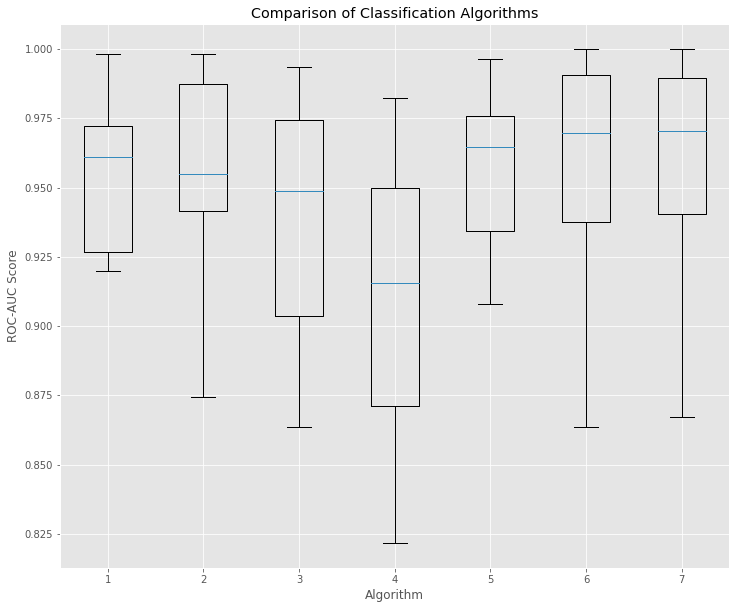

In [240]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
#ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [218]:
#visualizing RF
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot',
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False,
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

FileNotFoundError: [WinError 2] The system cannot find the file specified